# YData Quality - DataQuality Tutorial
Time-to-Value: 4 minutes

This notebook provides a tutorial to run the `ydata_quality.DataQuality` main class that aggregates all the individual data quality engines, each focused on a main topic of data quality (e.g. duplicates, missing values).

**Structure:**

1. Load dataset
2. Distort dataset
3. Instantiate the Data Quality engine
4. Run the quality checks
5. Assess the warnings
6. (Extra) Detailed overview

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from ydata_quality import DataQuality

## Load the example dataset
We will use a dataset available from the statsmodels package.

In [2]:
df_original = sm.datasets.get_rdataset('Guerry', 'HistData').data

## Distort the original dataset
Apply transformations to highlight the data quality functionalities.

In [3]:
def apply_quality_transformations(df: pd.DataFrame):
    "Force data quality issues to highlight functionality."
    # Copy to guarantee the original is kept intact
    df = df.copy()

    # Duplicates
    df = df.append(df[:20], ignore_index=True)
    df["dept2"] = df["dept"]
    return df

df = apply_quality_transformations(df_original)

## Create the main engine
The DataQuality class aggregates all the individual data quality engines, each focused on a main topic of data quality (e.g. duplicates, missing values). To create a DataQuality object, you provide:
- df: target DataFrame, for which we will run the test suite
- target (optional): target feature to be predicted in a supervised learning context
- entities (optional): list of feature names for which checking duplicates after grouping-by is applicable.
- vmv_extensions (optional): list of valued missing value to append to the defaults.

In [4]:
VMV_EXTENSIONS = ['a_custom_VMV', 'another_VMV', 999999999, '!', '', 'UNKNOWN']

In [5]:
dq = DataQuality(df=df, vmv_extensions=VMV_EXTENSIONS)

Label is not defined. Skipping LABELLING engine.


In [6]:
dq = DataQuality(df=df, label='Pop1831', vmv_extensions=VMV_EXTENSIONS)

### Full Evaluation
The easiest way to assess the data quality analysis is to run `.evaluate()` which returns a list of warnings for each quality check. 

[ENTITY DUPLICATES] There are no entities defined to run the analysis. Skipping the test.
[PREDEFINED VALUED MISSING VALUES] No predefined vmvs from  the set {'', '(blank)', 'na', 'unknown', 'unk', 'n/a', 'another_vmv', 'a_custom_vmv', '?', '!', 999999999} were found in the dataset.


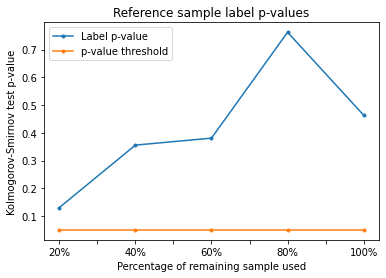

[MISSING LABELS] No missing labels were found.
[TEST NORMALITY] It was not possible to normalize the label values. See the warning message for additional context.


In [7]:
full_results = dq.evaluate()

## Check the status
After running the data quality checks, you can check the warnings for each individual test. The warnings are suited by priority and have additional details that can provide better insights for Data Scientists.

In [8]:
# Print the overall status of Data Quality discovered during evaluation
dq.report()

[TEST NORMALITY] The label distribution failed to pass a normality test as-is and following a battery of transforms.                        
	It is possible that the data originates from an exotic distribution, there is heavy outlier presence or it is multimodal.                        
	Addressing this issue might prove critical for regressor performance. (Priority 1: heavy impact expected)
[DUPLICATE COLUMNS] Found 1 columns with exactly the same feature values as other columns. (Priority 1: heavy impact expected)
[EXACT DUPLICATES] Found 20 instances with exact duplicate feature values. (Priority 2: usage allowed, limited human intelligibility)
[FLATLINES] Found 8 flatline events with a minimun length of 5 among the columns {'Region', 'MainCity'}. (Priority 2: usage allowed, limited human intelligibility)
[OUTLIER DETECTION] Found 2 potential outliers across the full dataset.                        
	A distance bigger than 3.0 standard deviations of intra-cluster distances to the re

In [9]:
# You can retrieve the full list of warnings or filtered by specific conditions
data_quality_warnings = dq.get_warnings()
duplicate_quality_warnings = dq.get_warnings(category='Duplicates')
priority_2_warnings = dq.get_warnings(priority=2)